In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## read trait information

In [2]:
df_LA = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_la.csv")
# df_SLA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_LDMC = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_d15n = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_d13c = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pc = pd.read_csv(r"D:\wenqu\2025_csv\grouped_pc.csv")
# df_pn = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")

In [4]:
df_LA

,site_quadrat,summed_sla_cover,la_cover,LDMC_cover,weighted_pc,weighted_d13c,weighted_pn,weighted_d15n,b1_mean,b2_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,S1B_1,142.017256,16.964266,0.399141,43.312469,-28.492351,1.599822,-2.674121,0.008066,0.020107,...,0.043727,0.039954,0.037774,0.036505,0.031699,0.034067,0.029817,0.037205,0.029428,0.042243
1,S1B_10,137.317848,19.273836,0.378223,39.021692,-28.543685,1.793593,1.831298,0.009731,0.021409,...,0.198313,0.074142,0.189852,0.078799,0.192470,0.080803,0.186395,0.084301,0.161744,0.079994
2,S1B_12,108.293186,12.971441,0.454268,49.725402,-27.295808,1.669954,-1.259432,0.015963,0.030240,...,0.348449,0.138326,0.329519,0.134143,0.340357,0.137214,0.337107,0.149233,0.307343,0.140250
3,S1B_15,123.388481,21.105415,0.394001,44.428647,-28.973192,1.026573,-1.056765,0.017786,0.032077,...,0.296591,0.087097,0.275578,0.088697,0.290174,0.092787,0.285764,0.097216,0.256345,0.101517
4,S1B_2,118.391528,24.763514,0.354407,44.926538,-28.681537,1.932214,-4.042904,0.007073,0.017995,...,0.076173,0.067074,0.066786,0.066255,0.066698,0.067615,0.061808,0.064345,0.063712,0.071650
5,S1B_20,94.135562,11.366000,0.445734,48.516694,-27.204024,1.481015,-1.730092,0.010889,0.020691,...,0.225069,0.092107,0.218147,0.086991,0.206561,0.086440,0.209682,0.102773,0.181247,0.093985
6,S1B_21,109.088039,8.027806,0.459154,47.676539,-28.966740,1.249016,-2.647368,0.009929,0.017353,...,0.133839,0.081525,0.122919,0.077663,0.125216,0.083903,0.129472,0.092927,0.114103,0.086872
7,S1B_22,94.580416,13.014333,0.405659,47.424929,-27.382402,1.575523,1.363522,0.008476,0.018636,...,0.190251,0.064974,0.178361,0.063290,0.171402,0.064732,0.175261,0.068934,0.181233,0.090873
8,S1B_23,89.053207,4.119655,0.445457,46.925521,-27.159258,1.430021,-1.414530,0.019044,0.030510,...,0.215321,0.079997,0.200189,0.077250,0.193078,0.075351,0.196568,0.077396,0.205232,0.106467
9,S1B_24,103.707786,56.208788,0.401110,47.851934,-27.271762,2.100739,-0.782026,0.015023,0.025020,...,0.278203,0.104499,0.265356,0.102955,0.261363,0.105431,0.263606,0.102916,0.287034,0.127808


## get band informationn

In [5]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'Band_' + str(i) + '_Mean'
    b_name_mean.append(b_mean)
    b_std = 'Band_' + str(i) + '_StdDev'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
band_name = np.array(band_name)
band_name

array(['Band_1_Mean', 'Band_2_Mean', 'Band_3_Mean', 'Band_4_Mean',
       'Band_5_Mean', 'Band_6_Mean', 'Band_7_Mean', 'Band_8_Mean',
       'Band_9_Mean', 'Band_10_Mean', 'Band_11_Mean', 'Band_12_Mean',
       'Band_13_Mean', 'Band_14_Mean', 'Band_15_Mean', 'Band_16_Mean',
       'Band_17_Mean', 'Band_18_Mean', 'Band_19_Mean', 'Band_20_Mean',
       'Band_21_Mean', 'Band_22_Mean', 'Band_23_Mean', 'Band_24_Mean',
       'Band_25_Mean', 'Band_26_Mean', 'Band_27_Mean', 'Band_28_Mean',
       'Band_29_Mean', 'Band_30_Mean', 'Band_31_Mean', 'Band_32_Mean',
       'Band_33_Mean', 'Band_34_Mean', 'Band_35_Mean', 'Band_36_Mean',
       'Band_37_Mean', 'Band_38_Mean', 'Band_39_Mean', 'Band_40_Mean',
       'Band_41_Mean', 'Band_42_Mean', 'Band_43_Mean', 'Band_44_Mean',
       'Band_45_Mean', 'Band_46_Mean', 'Band_47_Mean', 'Band_48_Mean',
       'Band_49_Mean', 'Band_50_Mean', 'Band_51_Mean', 'Band_52_Mean',
       'Band_53_Mean', 'Band_54_Mean', 'Band_55_Mean', 'Band_56_Mean',
       'Band_57

In [6]:
len(band_name)  

244

## prepare y variable for each traits

In [7]:
# y_weighted_sla = df_SLA['summed_sla_cover'].to_numpy()
y_weighted_la = df_LA['la_cover'].to_numpy()
# y_weighted_LDMC = df_LDMC['LDMC_cover'].to_numpy()
# y_weighted_pc = df_pc['weighted_pc'].to_numpy()
# y_weighted_d13c = df_d13c['weighted_d13c'].to_numpy()
# y_weighted_pn = df_pn['weighted_pn'].to_numpy()
# y_weighted_d15n = df_d15n['weighted_d15n'].to_numpy()







In [8]:
# df_LA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_SLA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_LDMC = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_15n = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_13c = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pc = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pn = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")

In [10]:
# x_pc = np.array(df_pc[band_name])
# x_pn = np.array(df_pn[band_name])
# x_ldmc = np.array(df_LDMC[band_name])
x_la = np.array(df_LA[band_name])
# x_sla = np.array(df_SLA[band_name])
# x_d13c = np.array(df_d13c[band_name])
# x_d15n = np.array(df_d15n[band_name])

KeyError: "None of [Index(['Band_1_Mean', 'Band_2_Mean', 'Band_3_Mean', 'Band_4_Mean',\n       'Band_5_Mean', 'Band_6_Mean', 'Band_7_Mean', 'Band_8_Mean',\n       'Band_9_Mean', 'Band_10_Mean',\n       ...\n       'Band_113_StdDev', 'Band_114_StdDev', 'Band_115_StdDev',\n       'Band_116_StdDev', 'Band_117_StdDev', 'Band_118_StdDev',\n       'Band_119_StdDev', 'Band_120_StdDev', 'Band_121_StdDev',\n       'Band_122_StdDev'],\n      dtype='object', length=244)] are in the [columns]"

In [9]:
x_pc

array([[0.00806591, 0.02010676, 0.00535555, ..., 0.03720465, 0.02942773,
        0.04224313],
       [0.00973139, 0.02140905, 0.00694379, ..., 0.08430113, 0.16174362,
        0.07999398],
       [0.01596289, 0.0302402 , 0.00918104, ..., 0.14923255, 0.30734291,
        0.14025026],
       ...,
       [0.00080788, 0.00313127, 0.00350743, ..., 0.0257857 , 0.21007136,
        0.03931431],
       [0.00331892, 0.00672721, 0.00407369, ..., 0.02323154, 0.19803156,
        0.04023387],
       [0.0058837 , 0.02166101, 0.00479126, ..., 0.0300419 , 0.18564624,
        0.0413648 ]])

## prepare site label information for each trait

In [10]:
labels_sla = [] 
for i in range(len(df_SLA['site_quadrat'])):
    
    site_name = df_SLA['site_quadrat'][i].split("_")[0]

    labels_sla.append(site_name)

In [11]:
labels_la = [] 
for i in range(len(df_LA['site_quadrat'])):    
    site_name = df_LA['site_quadrat'][i].split("_")[0]
    labels_la.append(site_name)

In [12]:
labels_ldmc = [] 
for i in range(len(df_LDMC['site_quadrat'])):    
    site_name = df_LDMC['site_quadrat'][i].split("_")[0]
    labels_ldmc.append(site_name)

In [13]:
labels_pc = [] 
for i in range(len(df_pc['site_quadrat'])):
    
    site_name = df_pc['site_quadrat'][i].split("_")[0]

    labels_pc.append(site_name)

In [14]:
labels_d13c = [] 
for i in range(len(df_d13c['site_quadrat'])):
    
    site_name = df_d13c['site_quadrat'][i].split("_")[0]

    labels_d13c.append(site_name)

In [15]:
labels_pn = [] 
for i in range(len(df_pn['site_quadrat'])):
    
    site_name = df_pn['site_quadrat'][i].split("_")[0]

    labels_pn.append(site_name)

In [16]:
labels_d15n = [] 
for i in range(len(df_d15n['site_quadrat'])):
    
    site_name = df_d15n['site_quadrat'][i].split("_")[0]

    labels_d15n.append(site_name)

In [17]:
print(len(labels_sla), len(labels_la), len(labels_ldmc), len(labels_pc), len(labels_d15n), len(labels_d13c), len(labels_pn))

65 65 65 62 65 65 65


## leave one out cross validation plsr model

In [18]:
def pls_variable_selection(X, y, max_comp):
    
    # Define an MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))



    # Loop over the number of PLS components
    for i in range(max_comp):
        # print(i)
        
        # Regression with the specified number of components, using the full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
 
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        # Discard one wavelength at a time from the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(max_j): 
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y.astype(np.float64), cv=5)
          

            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))        
            

      

    
    stdout.write("\n")
    
    # Find the indices of the minimum non-NaN MSE values
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    
    print("Optimised number of PLS components: ", mseminx[0] + 1)
    print("Wavelengths to be kept ", (X.shape[1] - mseminy[0]))
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")
 
    # Calculate PLS with optimal components and export values
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:, sorted_ind]
 
    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind

## train the model - plot the result based on different site label

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import csv

def simple_pls_cv(X, y, n_comp, labels, filename):
    


    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)


    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    rmse_c = mean_squared_error(y, y_c, squared=False)
    rmse_cv = mean_squared_error(y, y_cv, squared=False)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('RMSE calib: %5.3f' % rmse_c)
    print('RMSE CV: %5.3f' % rmse_cv)

    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    print(z[1],z[0])
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'S1B': {'marker': 'o', 'color': 'red'},
            'S2A': {'marker': 's', 'color': 'blue'},
            'S2C': {'marker': 'P', 'color': 'yellow'},
            'S6A': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
            
            
        for i, label in enumerate(labels):
            
            
            scatter_obj = ax.scatter(y_cv[i], y[i], marker=label_dict.get(label, label_dict['S6A'])['marker'],
                                     c=label_dict.get(label, label_dict['S6A'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


## log transform y variable

In [20]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)
log_y_weighted_pc = np.log(y_weighted_pc)
# log_y_weighted_d13c = np.log(y_weighted_d13c)
log_y_weighted_pn = np.log(y_weighted_pn)
# log_y_weighted_d15n = np.log(y_weighted_d15n)

# PC model 

In [21]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pc, log_y_weighted_pc, 50)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  war

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 49
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 49
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 49
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 49
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  war

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")



Optimised number of PLS components:  16
Wavelengths to be kept  51
Optimised MSEP  0.03718989894092078



R2 calib: 0.952
R2 CV: 0.712
RMSE calib: 0.014
RMSE CV: 0.035
0.3575273481477658 0.9056610508638602
0 S1B 3.742054918662927 3.768440552909456
1 S1B 3.6943128626215125 3.6641177043211433
2 S1B 3.8931164498144346 3.906515899116689
3 S1B 3.792494815008269 3.8317988766154567
4 S1B 3.8383732539614717 3.793884463862024
5 S1B 3.7920141687113262 3.8050286635806776
6 S1B 3.876775475596115 3.8819079416058115
7 S1B 3.8525180674377015 3.8644394221771052
8 S1B 3.9035675592108197 3.8591480085980128
9 S1B 3.877996311145841 3.8485616943980485
10 S1B 3.81677574119608 3.8681115429961737
11 S1B 3.8418550061703134 3.831202929482173
12 S1B 3.822522568797386 3.8452963151403616
13 S1B 3.766301421587035 3.837860041947044
14 S1B 3.7971518933950366 3.8329096934659193
15 S1B 3.8392625984438293 3.7940074992025736
16 S1B 3.8317122802462515 3.8210019790002216
17 S1B 3.8481645463771437 3.883400616968332
18 S1B 3.779453642538322 3.700152974512112
19 S1B 3.8384807733566797 3.7984467803977133
20 S1B 3.7910728158895077 

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


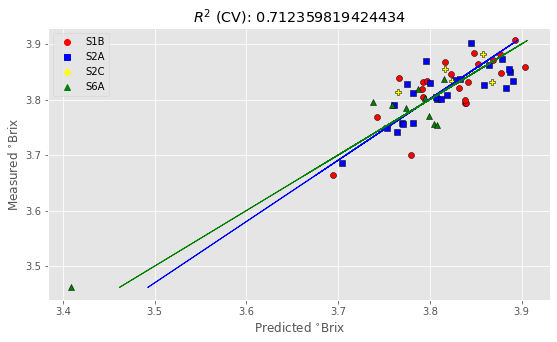

In [22]:
file_name_sla = r'D:\wenqu\chapter1_2\plot_level_model\244\pc.csv'
simple_pls_cv(opt_Xc, log_y_weighted_pc, ncomp, labels_pc,file_name_sla)

In [22]:
opt_Xc.shape

(63, 22)

In [23]:
print(ncomp, wav, sorted_ind)

15 222 [ 75  93  84  27  99 213  81 199 241  95  37  92  89 209  80  24 179  85
  35 131  42  91  20 202  94  53 101 208  97 175 159  65  76 100 143  10
 197 110  51  83  77   2  39  88  79  64  73  78 111 200 185 124  87  74
 222 237  98  66  14 194 227 117 210   7 226  68  17  71 154 106 187 118
 182   6 201 139  67 190 211  57 157 181  86 147  52  29 149  26 128 193
  60 135 156  34  28  41 223 196  63  44 198  49 217  72  82  30  59  69
 107  38 119 171  36 188 183  58 220 215  96 216 230 134  12 214 141  90
 203  70 221  40 172 178 191 186  32 142  22  55  48  62 195 114  33 151
 224 173 169 177 140 165 233  25  61 164 133 180 122 176 174   3 162  21
 148  50 192 204 120 219  13 170 235 137 129 102 109 121 239 115 184 225
 243 126 155 116  18 108 166  31  43 205 145  56 189  19  54 103 150 236
 105 146  23 125  15  16 206 123 152  11 104 127  46 153 161 168   8 160
 132 231   0  45   9  47 144 212 167 207 136 163   5 158 113   1   4 112
 218 234 232 130 242 138 228 229 238 240]


In [25]:
pls_pc = PLSRegression(n_components=20)
pls_pc.fit(x_pc, log_y_weighted_pc)

target_pc = pls_pc.coef_[:,0]
sorted_ind_pc = np.argsort(np.abs(target_pc))[::-1]
sorted_value_pc = target_pc[sorted_ind_pc]

print(x_new_traits.shape, sorted_ind_pc.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_pc = band_name[sorted_ind_pc][:26]
print(band_name_pc.shape, band_name_pc)

(65, 244) (244,)
(26,) ['b117_std' 'b107_std' 'b119_std' 'b9_std' 'b111_std' 'b108_std' 'b42_std'
 'b15_std' 'b5_mean' 'b122_mean' 'b113_std' 'b86_std' 'b46_std' 'b97_std'
 'b113_mean' 'b37_std' 'b17_std' 'b10_mean' 'b11_std' 'b114_mean'
 'b39_std' 'b48_mean' 'b31_std' 'b20_mean' 'b121_std' 'b110_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [26]:
sorted_value_pc[:26]

array([-0.10836449,  0.10829786, -0.1011533 , -0.071003  ,  0.06834505,
        0.06761153, -0.06633159,  0.06050388,  0.06043884,  0.05879213,
        0.05824248,  0.05676099, -0.05644324, -0.0555016 ,  0.05475462,
        0.05347387, -0.05211102, -0.05178811, -0.05139861,  0.05126992,
        0.04942042, -0.04618982, -0.04550507,  0.04518139,  0.0449538 ,
       -0.04408121])

# PN


Optimised number of PLS components:  16
Wavelengths to be kept  72
Optimised MSEP  0.26893306478151074

R2 calib: 0.922
R2 CV: 0.087
RMSE calib: 0.077
RMSE CV: 0.262
0.21975472045796157 0.5271294970376302
0 S1B 0.2334806313972858 0.46989259874427985
1 S1B 0.6414936202173279 0.5842210575133178
2 S1B 0.5076236868006168 0.19889733326790782
3 S1B 0.7997104337731337 0.5127960698224538
4 S1B 0.43254659695811987 0.40343391846067617
5 S1B 0.599588821572261 0.026225597916586428
6 S1B 0.6508928318426703 0.6586663700931578
7 S1B 0.7903208996265245 0.3927276889386126
8 S1B 0.47797388166210364 0.22235628044326056
9 S1B 0.46517999707985647 0.45458713867803385
10 S1B 0.48469303101181904 0.35768936392646566
11 S1B 0.8254662967328115 0.7422890833467151
12 S1B 0.15385914166553027 0.3885174974403732
13 S1B 0.24090063145153684 0.2571563627367568
14 S1B 0.3817846378600447 0.30882683568434943
15 S1B 0.2392385237230723 0.25779431907138556
16 S1B 0.6922089200400848 0.6128983235557623
17 S1B 0.169382433318258

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


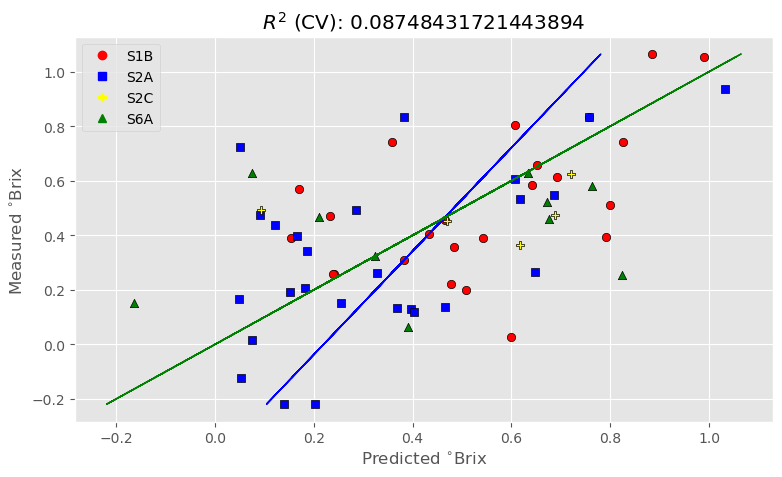

In [28]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pn, log_y_weighted_pn, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\pn.csv'
simple_pls_cv(opt_Xc, log_y_weighted_pn, ncomp, labels_pn, file_name)

# d13c


Optimised number of PLS components:  25
Wavelengths to be kept  85
Optimised MSEP  0.588674117467358

R2 calib: 0.998
R2 CV: 0.821
RMSE calib: 0.056
RMSE CV: 0.522
-1.9443875426296426 0.9292330106665804
0 S1B -28.440321753774096 -28.49235106
1 S1B -28.49346793378626 -28.54368527
2 S1B -26.800417369011264 -26.49680372
3 S1B -26.894755862736073 -27.29580842
4 S1B -28.10683185806638 -27.75547098
5 S1B -27.799454744299478 -28.97319202
6 S1B -28.35575799948284 -28.6815368
7 S1B -27.080311455597315 -27.20402389
8 S1B -29.215291936813966 -28.96674046
9 S1B -26.785480960746504 -27.38240162
10 S1B -26.540710095942465 -27.15925765
11 S1B -27.466687579261887 -27.27176191
12 S1B -28.574316068908008 -28.729117
13 S1B -28.757845484184838 -28.43561468
14 S1B -26.702780388975427 -26.69813342
15 S1B -27.82881142653218 -27.25219021
16 S1B -28.95950506236026 -28.65229353
17 S1B -28.78980210322771 -27.46525833
18 S1B -28.64231708304551 -27.741047
19 S1B -28.425894325758588 -28.88539209
20 S1B -27.8168763

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


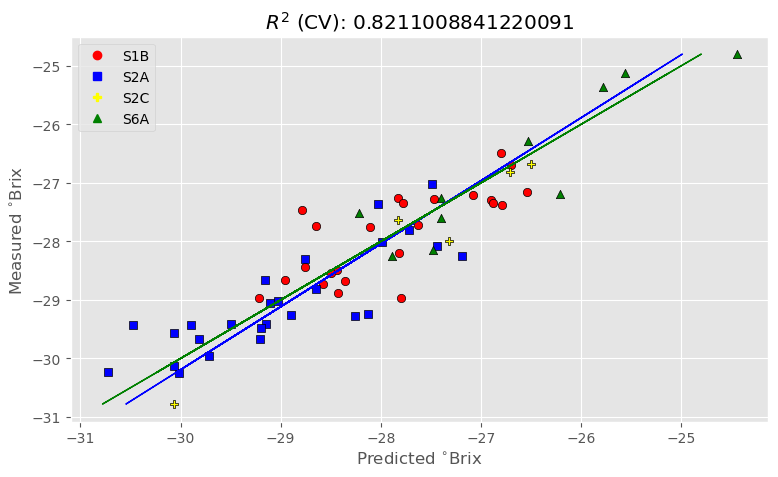

In [23]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, y_weighted_d13c, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\d13c.csv'
simple_pls_cv(opt_Xc, y_weighted_d13c, ncomp, labels_d13c, file_name)

# d15n


Optimised number of PLS components:  14
Wavelengths to be kept  31
Optimised MSEP  2.0635869924812384

R2 calib: 0.804
R2 CV: 0.445
RMSE calib: 1.141
RMSE CV: 1.921
-0.3493402158466917 0.6273963816360613
0 S1B -3.4930414541892914 -2.674120998
1 S1B 2.219149329681702 1.831297519313253
2 S1B 1.903823807709008 2.088882276970588
3 S1B -3.0656761392419876 -1.259432228
4 S1B -0.08142933427781163 -1.321240785
5 S1B 2.0173645968374663 -1.05676545
6 S1B -2.931360970129907 -4.042904221
7 S1B -1.5233883612585428 -1.73009192
8 S1B -2.502268718713071 -2.647368389
9 S1B 0.8577676399273592 1.3635219404252874
10 S1B -0.2456821777248731 -1.414529963
11 S1B 0.7033946458822157 -0.782025641
12 S1B -0.9429607866569385 -0.002255068
13 S1B -0.1513628795825691 -0.722110205
14 S1B -1.7563079246050286 0.847306639
15 S1B -1.5975450919225747 -2.601431106
16 S1B -3.407951890470711 -3.065337528
17 S1B -2.2805923271708926 0.007594137
18 S1B -2.15966574803515 -0.975922671
19 S1B -3.155208198232269 -0.647548399
20 S1

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


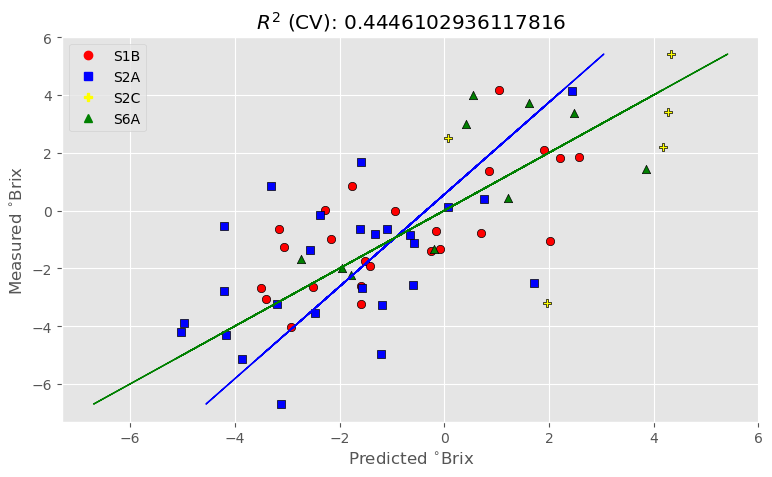

In [24]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, y_weighted_d15n, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\d15n.csv'
simple_pls_cv(opt_Xc, y_weighted_d15n, ncomp, labels_d15n, file_name)

# la


Optimised number of PLS components:  16
Wavelengths to be kept  45
Optimised MSEP  0.5421673830469794

R2 calib: 0.960
R2 CV: 0.712
RMSE calib: 0.216
RMSE CV: 0.582
0.28372843442635753 0.8865485045466166
0 S1B 2.654054935396279 2.831109109942947
1 S1B 4.645613251855886 2.958748531923056
2 S1B 3.8401051946134794 3.0732160689767873
3 S1B 3.0765989285752786 2.562750069874877
4 S1B 3.166763957103681 2.6002656357811067
5 S1B 3.847117378072772 3.0495296608515043
6 S1B 2.6408470732641067 3.209371340556637
7 S1B 1.953921386042986 2.43062644287493
8 S1B 2.5871000421564583 2.082911321477156
9 S1B 2.769694697073019 2.566051314186708
10 S1B 1.9852695254920694 1.4157694638426583
11 S1B 3.614910924778519 4.02907310785448
12 S1B 1.4096846558299019 2.3894518649342746
13 S1B 2.467650555251101 2.9339468821512855
14 S1B 2.2299741117220186 2.3578955317225954
15 S1B 1.7878325759930975 1.9087718376263287
16 S1B 2.874493720761536 2.651669193981665
17 S1B 2.1801481003601864 2.3363014541896954
18 S1B 3.308459

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


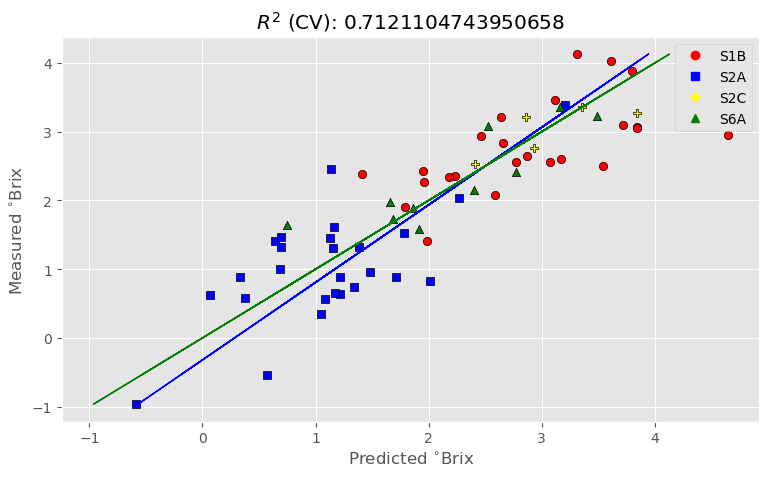

In [25]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_la, log_y_weighted_la, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\la.csv'
simple_pls_cv(opt_Xc, log_y_weighted_la, ncomp, labels_la, file_name)

# SLA


Optimised number of PLS components:  14
Wavelengths to be kept  42
Optimised MSEP  0.3531184470931243

R2 calib: 0.898
R2 CV: 0.605
RMSE calib: 0.164
RMSE CV: 0.323
0.825993970099097 0.8151772144404638
0 S1B 4.792266284386393 4.955948567824229
1 S1B 5.491075281862269 4.922298299358316
2 S1B 5.069600278865607 4.665497998663011
3 S1B 4.728608474521765 4.6848422323707855
4 S1B 5.293469388501874 4.859719497791214
5 S1B 4.569961721537393 4.815337757279735
6 S1B 4.451835378034831 4.773997165237631
7 S1B 4.69342903902578 4.544735888891621
8 S1B 5.071445781440307 4.692155257922741
9 S1B 4.060774978597382 4.549450435602308
10 S1B 4.3221250960779924 4.489234027672727
11 S1B 4.812069940077464 4.641577194934574
12 S1B 4.39714101631758 4.733111538329998
13 S1B 6.143028210626645 7.098959326580103
14 S1B 4.911979304477998 4.661362096296028
15 S1B 5.302794218854635 4.683412078540948
16 S1B 5.3232117612556 4.946873945464339
17 S1B 4.560942711718944 4.521344729650312
18 S1B 4.4102368115212105 4.6563904

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


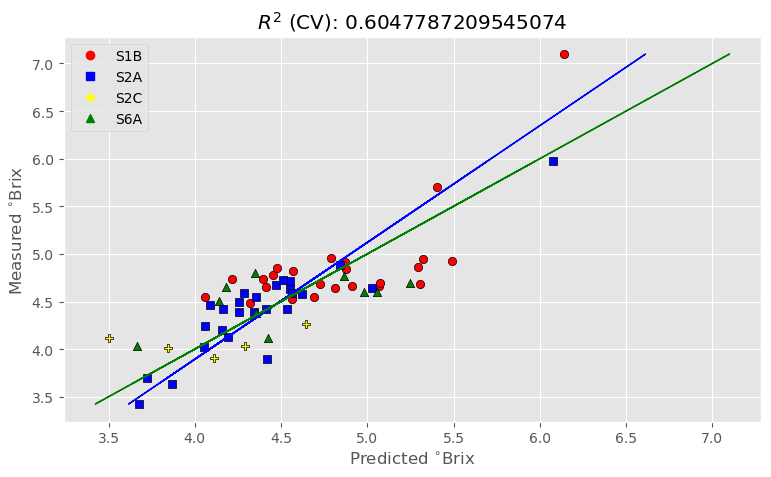

In [26]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, log_y_weighted_sla, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\sla.csv'
simple_pls_cv(opt_Xc, log_y_weighted_sla, ncomp, labels_sla, file_name)

# LDMC


Optimised number of PLS components:  26
Wavelengths to be kept  65
Optimised MSEP  0.3855677585619713

R2 calib: 0.993
R2 CV: 0.614
RMSE calib: 0.049
RMSE CV: 0.357
-0.1258044454504164 0.8079927972934883
0 S1B -0.912962866831396 -0.9184397819289111
1 S1B -1.2663848690597164 -0.9722715173174068
2 S1B -1.2176408988188923 -0.930033410372042
3 S1B -0.811942331236388 -0.7890678744629638
4 S1B -1.3960498014123794 -0.8479271969474741
5 S1B -1.000423244684687 -0.9314015179116197
6 S1B -0.7058208606071872 -1.037309730012808
7 S1B -0.2626468403776746 -0.8080338625679463
8 S1B -0.6991952371216402 -0.7783692534325567
9 S1B -0.48349034297735916 -0.9022429484994753
10 S1B -0.607731996237547 -0.8086544167359921
11 S1B -1.297756475717169 -0.913520049117007
12 S1B -0.6493714401172461 -0.8999872981518932
13 S1B -1.1320457262055523 -0.9198350820149053
14 S1B -0.06239981909532222 -0.7051586523254038
15 S1B -0.9871392273534277 -0.8537676929997231
16 S1B -1.2837757933078189 -0.931514437723835
17 S1B -1.294

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


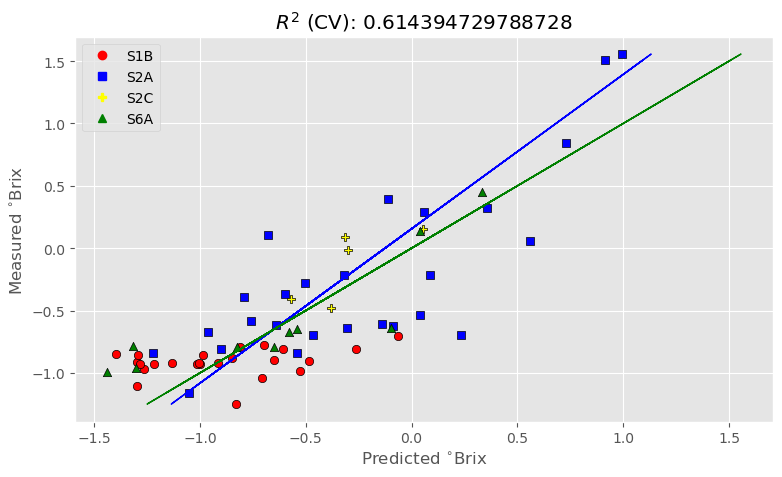

In [27]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, log_y_weighted_LDMC, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\ldmc.csv'
simple_pls_cv(opt_Xc, log_y_weighted_LDMC, ncomp, labels_ldmc, file_name)


Optimised number of PLS components:  28
Wavelengths to be kept  74
Optimised MSEP  0.7260774692121913

R2 calib: 0.994
R2 CV: 0.628
RMSE calib: 0.090
RMSE CV: 0.723
-0.11861895922876478 0.9945488393612735
0 site1b -28.826165065531036 -28.49235106
1 site1b -27.39932002834734 -28.54368527
2 site1b -26.29638332477497 -26.49680372
3 site1b -27.73067794797311 -27.29580842
4 site1b -26.786869649965258 -27.75547098
5 site1b -29.738771969053484 -28.97319202
6 site1b -26.152448402935466 -25.73567494
7 site1b -28.462922298288117 -28.6815368
8 site1b -26.97924315682576 -27.20402389
9 site1b -28.67533164134222 -28.96674046
10 site1b -28.295776226615637 -27.38240162
11 site1b -27.483718020585677 -27.15925765
12 site1b -28.400031234637886 -27.27176191
13 site1b -28.619182941737193 -28.729117
14 site1b -27.725851406707108 -28.43561468
15 site1b -26.06308743494362 -26.69813342
16 site1b -26.17505094893366 -27.25219021
17 site1b -29.373811732004903 -28.65229353
18 site1b -27.72405646855144 -27.4652583

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


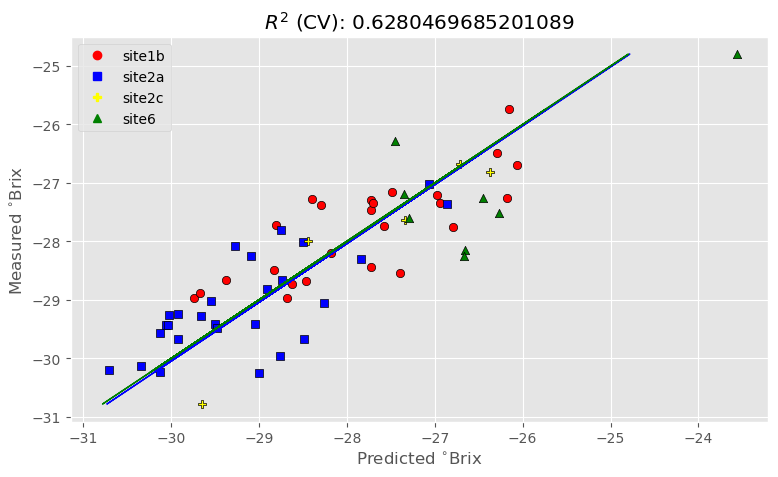

In [28]:
# opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_new_traits, y_weighted_d13c, 50)
# file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\d13c.csv'
# simple_pls_cv(opt_Xc, y_weighted_d13c, ncomp, labels_d13c, file_name)

In [28]:

pls_pc = PLSRegression(n_components=27)
pls_pc.fit(x_new_traits, y_weighted_d13c)

target_pc = pls_pc.coef_[:,0]
sorted_ind_pc = np.argsort(np.abs(target_pc))[::-1]
sorted_value_pc = target_pc[sorted_ind_pc]

print(x_new_traits.shape, sorted_ind_pc.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_pc = band_name[sorted_ind_pc][:66]
print(band_name_pc.shape, band_name_pc)

(65, 244) (244,)
(66,) ['b111_std' 'b17_std' 'b108_mean' 'b10_mean' 'b26_mean' 'b26_std'
 'b122_mean' 'b121_std' 'b109_std' 'b118_std' 'b1_mean' 'b9_mean'
 'b6_mean' 'b45_std' 'b37_std' 'b54_mean' 'b3_mean' 'b29_std' 'b32_std'
 'b107_std' 'b89_std' 'b14_std' 'b50_mean' 'b119_std' 'b93_std' 'b55_mean'
 'b33_std' 'b47_mean' 'b115_std' 'b99_std' 'b117_mean' 'b61_std'
 'b19_mean' 'b59_std' 'b4_mean' 'b8_mean' 'b79_std' 'b68_mean' 'b33_mean'
 'b105_std' 'b53_std' 'b99_mean' 'b108_std' 'b41_mean' 'b56_mean'
 'b112_std' 'b42_std' 'b67_mean' 'b34_std' 'b69_mean' 'b122_std' 'b9_std'
 'b16_mean' 'b7_std' 'b4_std' 'b85_std' 'b69_std' 'b5_std' 'b13_std'
 'b30_mean' 'b40_std' 'b31_mean' 'b5_mean' 'b13_mean' 'b47_std'
 'b120_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# PN

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  37
Wavelengths to be discarded  160
Optimised MSEP  0.033253030129035535

R2 calib: 1.000
R2 CV: 0.664
RMSE calib: 0.004
RMSE CV: 0.161
[0.13190193] [0.73016377]
0 site1b [0.48576221] 0.4698925987070734
1 site1b [0.69908898] 0.5842210573386667
2 site1b [0.42448831] 0.19889733307505286
3 site1b [0.83649179] 0.5127960697615571
4 site1b [0.5307248] 0.4034339186388153
5 site1b [0.39227071] 0.026225597943274455
6 site1b [0.34488962] 0.43226677637704264
7 site1b [0.63084191] 0.6586663699392942
8 site1b [0.62500271] 0.39272768918414447
9 site1b [0.39536417] 0.2223562806980066
10 site1b [0.54980247] 0.4545871384737593
11 site1b [0.40054587] 0.3576893637409396
12 site1b [0.97368987] 0.7422890833382898
13 site1b [0.46338671] 0.38851749721129836
14 site1b [0.1693803] 0.25715636301359845
15 site1b [0.24677091] 0.30882683544547823
16 site1b [-0.00148799] 0.2577943189241944
17 site1b [0.54893981] 0.6128983235557623
18 site1b [0.26105405] 0.57155872

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


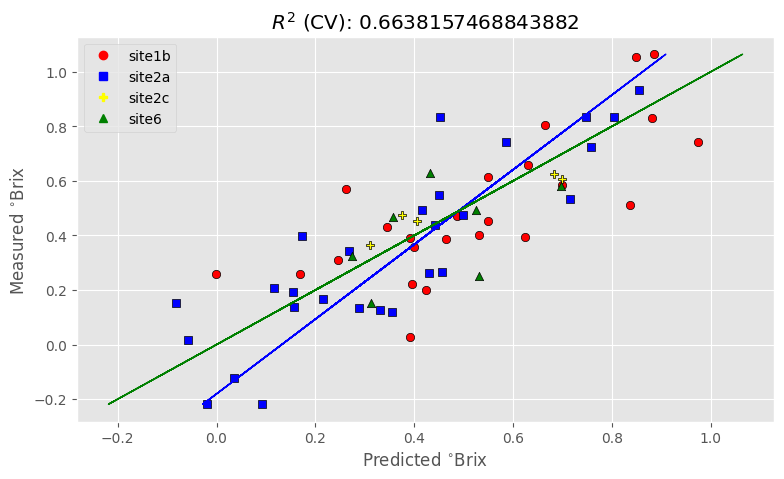

In [25]:
# opt_Xc_PN, ncomp_PN, wav_PN, sorted_ind_PN = pls_variable_selection(x_new_traits, log_y_weighted_pn, 50)
# file_name = 'F:/wenqu/result/pn.csv'
# simple_pls_cv(opt_Xc_PN, log_y_weighted_pn, ncomp_PN, labels_pc, file_name)

In [30]:
pls_pn = PLSRegression(n_components=37)
pls_pn.fit(x_new_traits, log_y_weighted_pn)

target_pn = pls_pn.coef_[:,0]
sorted_ind_pn = np.argsort(np.abs(target_pn))[::-1]
sorted_value_pn = target_pn[sorted_ind_pn]

print(x_new_traits.shape, sorted_ind_pn.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_pn = band_name[sorted_ind_pn][:84]
print(band_name_pn.shape, band_name_pn)

(65, 244) (244,)
(84,) ['b7_mean' 'b52_std' 'b120_std' 'b118_mean' 'b13_mean' 'b61_std' 'b59_std'
 'b109_std' 'b29_std' 'b103_std' 'b60_std' 'b37_std' 'b34_std' 'b101_std'
 'b15_std' 'b122_mean' 'b57_mean' 'b17_std' 'b6_std' 'b22_std' 'b114_std'
 'b56_std' 'b2_std' 'b7_std' 'b111_mean' 'b111_std' 'b113_mean' 'b15_mean'
 'b101_mean' 'b63_std' 'b41_std' 'b117_std' 'b26_std' 'b21_mean' 'b65_std'
 'b93_std' 'b58_std' 'b11_std' 'b56_mean' 'b28_std' 'b32_std' 'b9_std'
 'b5_std' 'b24_std' 'b99_std' 'b48_std' 'b13_std' 'b64_std' 'b9_mean'
 'b8_mean' 'b1_mean' 'b118_std' 'b83_std' 'b78_std' 'b50_std' 'b12_mean'
 'b16_std' 'b66_std' 'b8_std' 'b27_std' 'b104_mean' 'b53_std' 'b109_mean'
 'b18_std' 'b35_std' 'b16_mean' 'b3_mean' 'b31_std' 'b72_std' 'b82_std'
 'b95_std' 'b23_mean' 'b61_mean' 'b67_std' 'b108_std' 'b89_std' 'b110_std'
 'b117_mean' 'b59_mean' 'b116_std' 'b85_std' 'b66_mean' 'b102_std'
 'b107_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [31]:
sorted_value_pn[:84]

array([ 0.55272269,  0.54485681,  0.54452796, -0.52196087, -0.51887992,
       -0.51586363, -0.51022164,  0.48114734,  0.45738779, -0.41039713,
       -0.39645388,  0.38459999, -0.37472403,  0.36762751,  0.36236343,
       -0.36058355,  0.35823215, -0.350256  ,  0.34185063, -0.34123397,
       -0.32821095, -0.32565385, -0.32357929, -0.31873413, -0.31672803,
        0.3112561 ,  0.30872965, -0.30819937,  0.30752129,  0.30743116,
       -0.29994245, -0.29615527,  0.28975365,  0.2891974 ,  0.28737059,
        0.28696245,  0.28542525, -0.28180908,  0.27552681, -0.27546655,
       -0.26468825,  0.2627846 , -0.25708277,  0.25589598, -0.25533483,
        0.24978614,  0.24645007,  0.24578199, -0.24128786, -0.23684644,
       -0.23287229, -0.2281919 ,  0.22818734, -0.219602  ,  0.21737771,
       -0.21645567,  0.2142386 ,  0.21362155, -0.20993232,  0.20697094,
        0.20614031,  0.20236118,  0.19931766, -0.19771866, -0.19264582,
        0.19238957,  0.18600994, -0.18393208, -0.18363422, -0.18

# D15N


Optimised number of PLS components:  1
Wavelengths to be kept  50
Optimised MSEP  2.560337829059712

R2 calib: 0.067
R2 CV: -0.029
RMSE calib: 2.410
RMSE CV: 2.531
-0.8216553205003233 0.02780868206329642
0 site1b -0.05325272395113645 -2.674120998
1 site1b -0.5608178294921619 1.831297519
2 site1b -0.26351617818549167 2.088882277
3 site1b -0.29876292881933575 -1.259432228
4 site1b -0.21683181808315954 -1.321240785
5 site1b -1.6504551128138978 -1.05676545
6 site1b -1.2848394633148654 2.243227495
7 site1b 0.016703218830641964 -4.042904221
8 site1b -0.6640170424378263 -1.73009192
9 site1b -0.8223630794083265 -2.647368389
10 site1b -0.3101423773047105 1.36352194
11 site1b -1.042124187910833 -1.414529963
12 site1b -0.42451952430190354 -0.782025641
13 site1b -0.7482435433171805 -0.002255068
14 site1b -1.9719618087011974 -0.722110205
15 site1b -1.3596797197916013 0.847306639
16 site1b -2.278228473210741 -2.601431106
17 site1b -1.2325904455818337 -3.065337528
18 site1b -1.7960898475348581 0.007

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


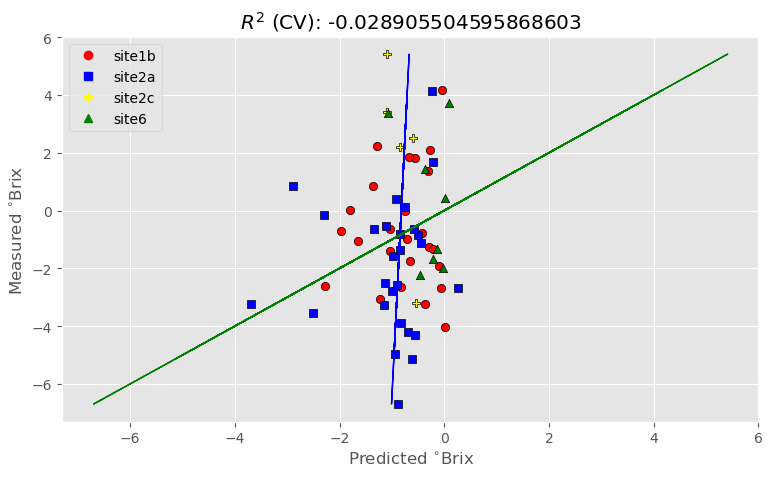

In [29]:
opt_Xc_D15N, ncomp_D15N, wav_D15N, sorted_ind_D15N = pls_variable_selection(x_new_traits, y_weighted_d15n, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\d15n.csv'
simple_pls_cv(opt_Xc_D15N, y_weighted_d15n, ncomp_D15N, labels_d15n, file_name)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  211
Optimised MSEP  4.337884595295797

R2 calib: 0.805
R2 CV: 0.306
MSE calib: 1.214
MSE CV: 4.322


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


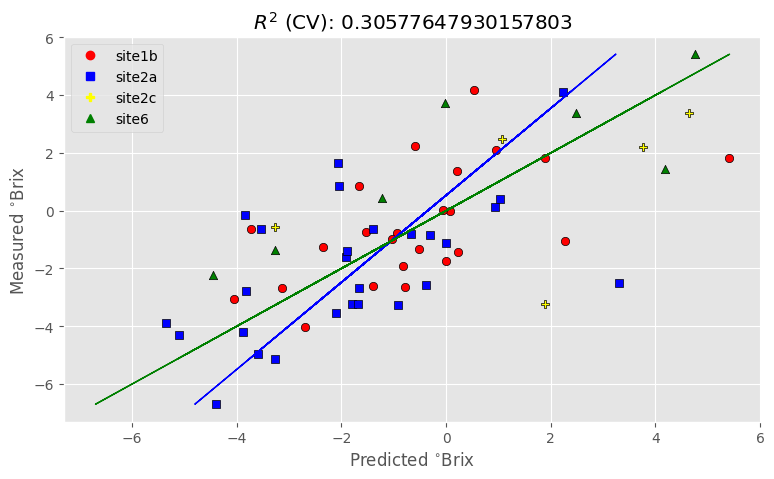

In [32]:
# opt_Xc_D15N, ncomp_D15N, wav_D15N, sorted_ind_D15N = pls_variable_selection(x_new_traits, y_weighted_d15n, 50)
# simple_pls_cv(opt_Xc_D15N, y_weighted_d15n, ncomp_D15N, labels_pc)

In [33]:
pls_D15N = PLSRegression(n_components=15)
pls_D15N.fit(x_new_traits, y_weighted_d15n)

target_D15N = pls_D15N.coef_[:,0]
sorted_ind_D15N = np.argsort(np.abs(target_D15N))[::-1]
sorted_value_D15N = target_D15N[sorted_ind_D15N]

print(x_new_traits.shape, sorted_ind_D15N.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_D15N = band_name[sorted_ind_D15N][:17]
print(band_name_D15N.shape, band_name_D15N)

(65, 244) (244,)
(17,) ['b118_std' 'b120_std' 'b108_mean' 'b113_std' 'b99_std' 'b9_std' 'b15_std'
 'b8_mean' 'b11_std' 'b101_std' 'b98_std' 'b109_std' 'b3_mean' 'b18_std'
 'b122_mean' 'b7_mean' 'b14_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## SLA trait model performance

In [ ]:
opt_Xc_sla, ncomp_sla, wav_sla, sorted_ind_sla = pls_variable_selection(x_sla, log_y_weighted_sla, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\sla.csv'
simple_pls_cv(opt_Xc_sla, y_weighted_sla, ncomp_sla, labels_sla, file_name)

In [22]:
# opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_sla, log_y_weighted_sla, 20)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  202
Optimised MSEP  0.04229627536615127



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [35]:
    # Calculate PLS with optimal components and export values
pls_sla = PLSRegression(n_components=15)
pls_sla.fit(x_sla, log_y_weighted_sla)

target = pls_sla.coef_[:,0]
sorted_ind_sla = np.argsort(np.abs(target))[::-1]
sorted_value = target[sorted_ind_sla]

print(x_sla.shape, sorted_ind_sla.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_sla = band_name[sorted_ind_sla][:42]
print(band_name_sla.shape, band_name_sla)

(63, 244) (244,)
(42,) ['b12_std' 'b107_std' 'b3_mean' 'b2_mean' 'b25_std' 'b103_std' 'b8_mean'
 'b8_std' 'b98_std' 'b7_std' 'b9_std' 'b116_std' 'b7_mean' 'b113_std'
 'b17_std' 'b59_std' 'b60_mean' 'b108_std' 'b52_std' 'b112_mean'
 'b121_mean' 'b16_std' 'b59_mean' 'b86_std' 'b97_std' 'b91_std' 'b119_std'
 'b48_std' 'b1_mean' 'b29_std' 'b5_std' 'b6_mean' 'b41_std' 'b117_mean'
 'b102_std' 'b14_std' 'b46_std' 'b13_std' 'b117_std' 'b90_mean' 'b96_std'
 'b18_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [36]:
sorted_value[:37]

array([-0.43441829, -0.39240569, -0.38522312,  0.37671377, -0.36683129,
       -0.36202362, -0.35725346, -0.34392944, -0.3264925 , -0.32592062,
        0.31701645,  0.30761535,  0.29245009,  0.28043509,  0.27255313,
       -0.25766164,  0.25359708,  0.24704501,  0.2466168 , -0.23303733,
       -0.22981616,  0.22639593,  0.22341652, -0.21638367,  0.21133117,
        0.20329602, -0.20258454,  0.19983927, -0.19916218,  0.18925685,
        0.1816399 ,  0.17864415, -0.1773872 ,  0.17662077, -0.17521421,
        0.17427863,  0.1701916 ])

R2 calib: 0.900
R2 CV: 0.468
RMSE calib: 8.799
RMSE CV: 20.340
[33.31312045] [0.65633637]
0 site2a [90.82464445] 103.2747295
1 site2a [101.13165439] 80.66983293
2 site2a [110.57636224] 102.8284309
3 site2a [83.80589003] 82.91700421
4 site2a [55.24663959] 30.65948379
5 site2a [73.92478294] 89.33730883
6 site2a [107.69757198] 97.78524765
7 site2a [86.19936615] 82.95197565
8 site2a [39.2750711] 40.13411702
9 site2a [90.05169207] 61.70927471
10 site2a [87.49594235] 106.8069372
11 site2a [67.10074472] 111.3697206
12 site2a [90.81499145] 67.02416794
13 site2a [68.06036053] 38.03518483
14 site2a [43.76769782] 49.08897627
15 site2a [86.98112915] 94.56050239
16 site2a [137.63766782] 97.95345642
17 site2a [31.07956473] 56.02569175
18 site2a [79.63987338] 86.59930961
19 site2a [98.00676857] 131.975223
20 site2a [112.17788977] 112.5509823
21 site2a [45.64638231] 83.23380828
22 site2a [82.83129548] 80.82213805
23 site2a [79.8300393] 69.86282383
24 site2a [118.81027863] 98.0068749
25 site1b [121.011

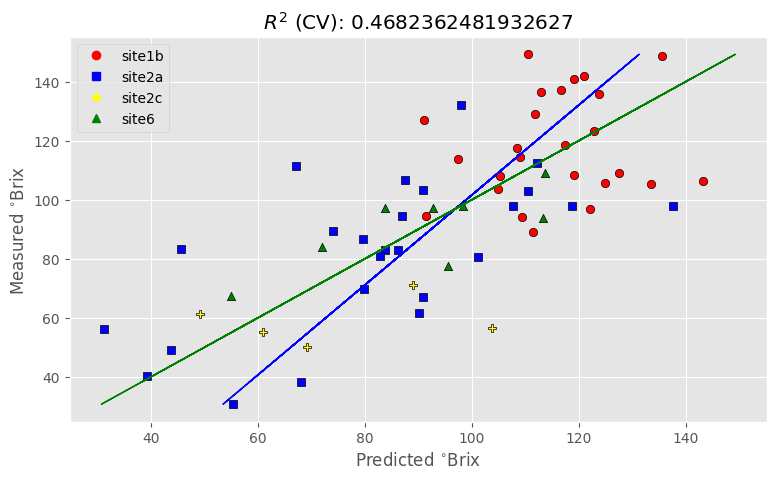

In [26]:
file_name = 'F:/wenqu/result/sla.csv'
simple_pls_cv(opt_Xc, y_weighted_sla, ncomp, labels_sla,file_name)

# LA trait model performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  19
Wavelengths to be discarded  216
Optimised MSEP  0.25118937049737045

R2 calib: 0.942
R2 CV: 0.800
RMSE calib: 0.280
RMSE CV: 0.519
[0.20146711] [0.9095718]
0 site2a [1.28002294] 2.03933806110202
1 site2a [0.49298462] 0.6395845072894734
2 site2a [1.22150664] 0.5745683736115578
3 site2a [0.98519381] 0.34365992178293403
4 site2a [1.10081839] 1.0043016091968684
5 site2a [3.26693958] 3.3856366879307305
6 site2a [1.37062221] 1.4142337297280947
7 site2a [1.18653634] 1.523410666446841
8 site2a [1.11405224] 1.3283067266597688
9 site2a [0.83511819] 0.5730959494921153
10 site2a [1.94340388] 1.6203124030507472
11 site2a [1.48105323] 0.8304286552040054
12 site2a [1.37375493] 0.8854470368753472
13 site2a [1.02541944] 0.9573733110632762
14 site2a [0.1008357] 0.8908330540059648
15 site2a [0.90362159] 0.8911149257045661
16 site2a [0.14790939] 0.7441858972203359
17 site2a [1.92067543] 1.3263563525774782
18 site2a [-0.09497298] 0.6257108477521713
19

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


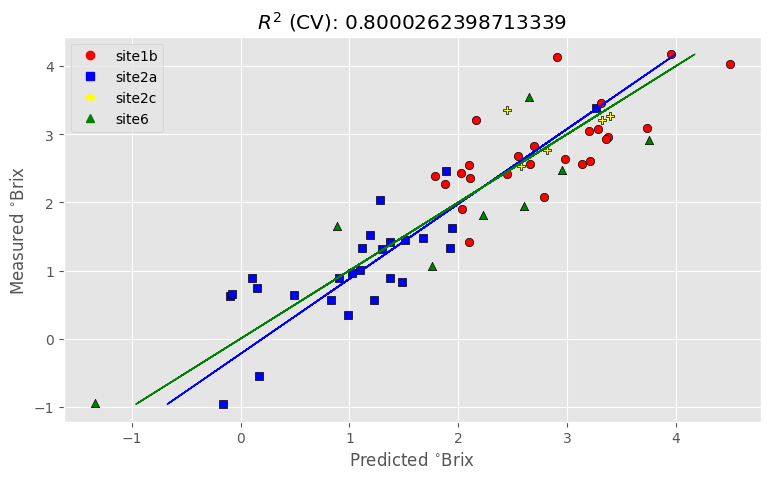

In [27]:
opt_Xc_la, ncomp_la, wav_la, sorted_ind_la = pls_variable_selection(x_la, log_y_weighted_la, 20)
file_name = 'F:/wenqu/result/la.csv'
simple_pls_cv(opt_Xc_la, log_y_weighted_la, ncomp_la, labels_la,file_name)

In [39]:
pls_la = PLSRegression(n_components=19)
pls_la.fit(x_la, log_y_weighted_la)

target_la = pls_la.coef_[:,0]
sorted_ind_la = np.argsort(np.abs(target_la))[::-1]
sorted_value_la = target_la[sorted_ind_la]

print(x_la.shape, sorted_ind_la.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_la = band_name[sorted_ind_la][:28]
print(band_name_la.shape, band_name_la)

(64, 244) (244,)
(28,) ['b120_std' 'b4_mean' 'b12_std' 'b103_std' 'b7_std' 'b8_std' 'b107_std'
 'b108_mean' 'b122_std' 'b10_std' 'b5_mean' 'b2_mean' 'b52_std'
 'b110_mean' 'b1_mean' 'b15_mean' 'b11_std' 'b56_std' 'b65_std' 'b105_std'
 'b116_std' 'b32_std' 'b108_std' 'b6_std' 'b24_std' 'b64_std' 'b75_mean'
 'b42_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [40]:
sorted_value_la[:28]

array([ 1.5185541 ,  1.31489055,  1.20525765, -1.19013593, -1.1524492 ,
       -1.09263922,  1.06409971,  1.06288379, -1.03047211,  1.00743494,
        0.97274802, -0.92978124,  0.92053764, -0.84902447, -0.83916159,
       -0.83282995, -0.81182278, -0.79145067,  0.77426903, -0.76944473,
       -0.75237812, -0.71333558,  0.70569779,  0.66277997,  0.65061342,
        0.64109899, -0.62028272, -0.61463346])

## LDMC trait performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  19
Wavelengths to be discarded  186
Optimised MSEP  0.06728643202469226

R2 calib: 0.975
R2 CV: 0.586
RMSE calib: 0.067
RMSE CV: 0.274
[-0.09845477] [0.8085888]
0 site2a [-0.31952969] -0.8400546733818541
1 site2a [-0.67505719] -0.6281332243345488
2 site2a [-0.22865851] -0.27934189264188575
3 site2a [-0.43528024] -0.6983870185650685
4 site2a [-0.25668957] -0.5343744161848074
5 site2a [-0.2988553] -0.21647660611469058
6 site2a [-0.1128192] -0.2167898252991496
7 site2a [-1.0382816] -0.36857314188241097
8 site2a [-0.31131278] -0.6942240461716448
9 site2a [-0.42164095] -0.6078965450996374
10 site2a [0.10599422] 0.3935791322690429
11 site2a [0.1720445] 0.32185538909601774
12 site2a [-0.40894714] 0.06038465890999225
13 site2a [-0.11440115] -0.5834753932040008
14 site2a [-1.21052866] -0.8380249381313605
15 site2a [0.18983035] 0.10578779196230385
16 site2a [-0.48570688] -0.639776384474245
17 site2a [-0.55268807] -0.812539884036738
18 site2a [-

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


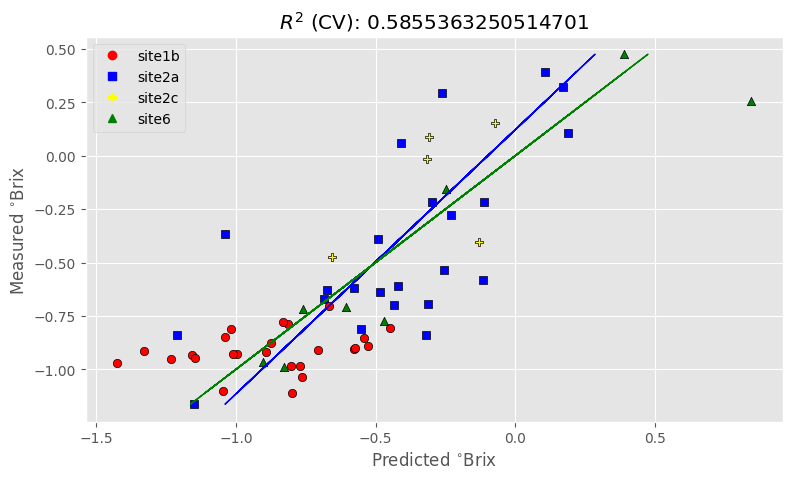

In [28]:
opt_Xc_ldmc, ncomp_ldmc, wav_ldmc, sorted_ind_ldmc = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 20)
file_name = 'F:/wenqu/result/ldmc.csv'
simple_pls_cv(opt_Xc_ldmc, log_y_weighted_LDMC, ncomp_ldmc, labels_ldmc,file_name)

In [42]:
pls_ldm = PLSRegression(n_components=19)
pls_ldm.fit(x_ldmc, log_y_weighted_LDMC)

target_ldmc = pls_ldm.coef_[:,0]
sorted_ind_ldmc = np.argsort(np.abs(target_ldmc))[::-1]
sorted_value_ldmc = target_ldmc[sorted_ind_ldmc]

print(x_ldmc.shape, sorted_value_ldmc.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_ldmc = band_name[sorted_ind_ldmc][:58]
print(band_name_ldmc.shape, band_name_ldmc)

(61, 244) (244,)
(58,) ['b12_std' 'b107_std' 'b114_std' 'b122_mean' 'b104_std' 'b118_std'
 'b29_std' 'b103_std' 'b7_mean' 'b49_std' 'b100_std' 'b22_std' 'b19_mean'
 'b4_mean' 'b106_std' 'b117_std' 'b10_mean' 'b11_std' 'b118_mean'
 'b33_std' 'b111_mean' 'b2_std' 'b3_mean' 'b113_std' 'b25_std' 'b41_std'
 'b6_std' 'b16_std' 'b51_std' 'b16_mean' 'b10_std' 'b23_std' 'b21_mean'
 'b104_mean' 'b8_mean' 'b114_mean' 'b17_mean' 'b112_std' 'b107_mean'
 'b112_mean' 'b113_mean' 'b108_std' 'b50_std' 'b62_std' 'b59_mean'
 'b26_std' 'b42_std' 'b37_std' 'b59_std' 'b83_std' 'b86_std' 'b121_mean'
 'b1_std' 'b24_std' 'b91_std' 'b5_std' 'b13_mean' 'b45_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [44]:
sorted_value_ldmc[:58]

array([ 0.87283161,  0.69586035, -0.66216271,  0.53449396,  0.52959853,
       -0.51677891, -0.51652949,  0.49197749, -0.47320977, -0.45132279,
        0.43157955, -0.4299128 ,  0.42356136, -0.41807745, -0.41080967,
       -0.40569663, -0.39670665, -0.3766288 ,  0.37580329,  0.36225404,
       -0.36005039,  0.34960647,  0.34876766, -0.33919639,  0.33252942,
        0.32446598,  0.31578737,  0.30682573,  0.29809496, -0.29412146,
       -0.29301816, -0.29029987,  0.28407104, -0.28067554,  0.2805083 ,
        0.27004133,  0.26827698,  0.26773506, -0.26088023,  0.25704999,
       -0.254121  ,  0.24826321,  0.24789986, -0.24468324, -0.24161315,
        0.24145099, -0.23940519, -0.23181667,  0.22976915, -0.22756014,
        0.22554545,  0.22318177, -0.22065604, -0.21060886, -0.20830108,
       -0.20511101, -0.20482014,  0.20317165])

In [7]:
def optimise_pls_cv(X, y, n_comp, vol_mois, n_2a, n_1b, n_2c, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    print(y_c.shape, type(y_c), y_c[0:27, ])   
    
#     break
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    
    


 
    # Fit a line to the CV vs response

    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
       
        ax.scatter(y_c[0:n_2a, ], y[0:n_2a, ], c=vol_mois[0:n_2a, ],  cmap='Spectral', marker= '*',edgecolors='k')
        ax.scatter(y_c[n_2a:n_1b, ], y[n_2a:n_1b, ], c=vol_mois[n_2a:n_1b, ],  cmap='Spectral', marker= 'v',edgecolors='k')
        ax.scatter(y_c[n_1b:n_2c, ], y[n_1b:n_2c, ], c=vol_mois[n_1b:n_2c, ],  cmap='Spectral', marker= '.',edgecolors='k')
#         plt.colorbar()
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

100% completed
Suggested number of components:  4



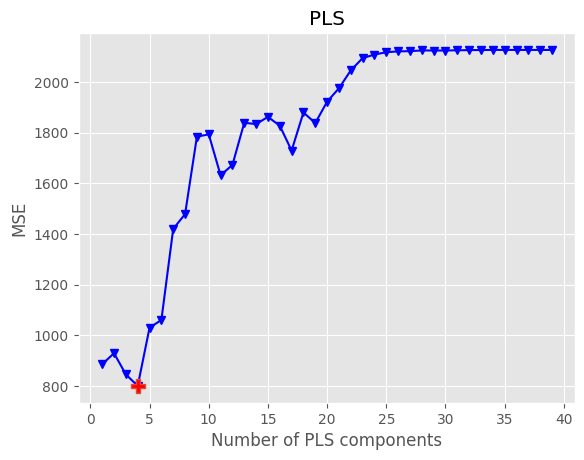

(56, 1) <class 'numpy.ndarray'> [[100.14522519]
 [ 83.44556852]
 [ 82.30072386]
 [ 95.7502133 ]
 [ 89.91668521]
 [ 72.95647577]
 [ 65.81979966]
 [ 90.05550588]
 [ 98.59752861]
 [ 71.97082453]
 [ 74.59151939]
 [110.04590405]
 [ 73.38565248]
 [ 75.989292  ]
 [ 60.00641012]
 [ 79.88287051]
 [ 83.07218245]
 [104.34650163]
 [ 49.56486446]
 [ 88.14917957]
 [ 89.66255983]
 [ 98.01474101]
 [ 77.54400701]
 [ 78.8488547 ]
 [ 82.89128284]
 [ 93.60250684]
 [ 95.85132464]]
97.52951800160714 30.65948379 156.4331066 (56,)
98.14194881957064 54.58155491004162 136.91026429099426 (56,)
0.4022353399517946 0.0021184653748089676
R2 calib: 0.392
R2 CV: 0.122
MSE calib: 554.097
MSE CV: 800.217


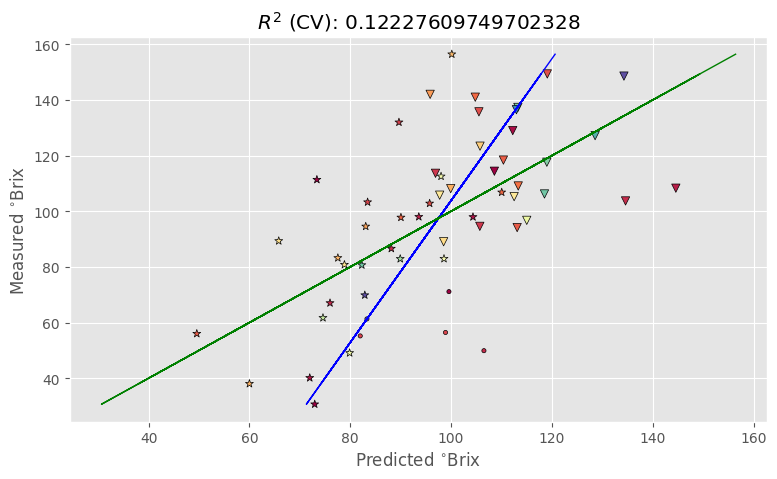

In [8]:
optimise_pls_cv(x_sla,y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



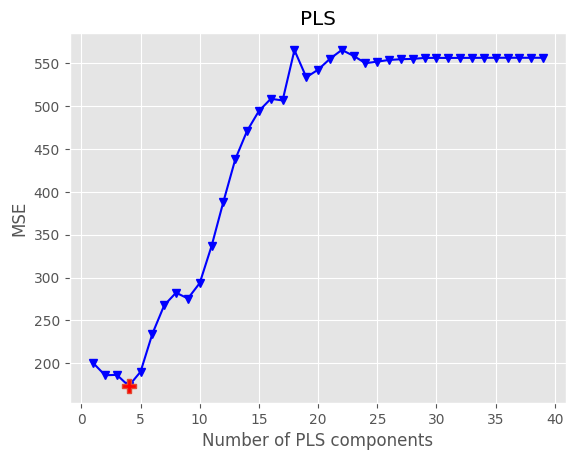

(57, 1) <class 'numpy.ndarray'> [[16.12334583]
 [ 8.64010269]
 [ 0.32257711]
 [13.63182918]
 [ 9.8043189 ]
 [ 1.85828811]
 [ 5.80304817]
 [12.13157419]
 [14.31505597]
 [ 2.1227174 ]
 [ 5.03779966]
 [21.28610393]
 [13.38236389]
 [-3.7934635 ]
 [ 2.25644219]
 [ 1.01631938]
 [16.10958415]
 [ 4.83543848]
 [ 3.06297141]
 [-8.76390189]
 [12.99444201]
 [ 7.59972832]
 [ 8.57117804]
 [ 1.17405755]
 [ 4.38521038]
 [ 7.43526545]
 [10.40477663]]
13.105196248473685 0.382217195 64.9665 (57,)
12.891763435905611 -12.031634986458883 36.17553260363307 (57,)
0.41715084266962005 0.001245778628025292
R2 calib: 0.351
R2 CV: 0.125
MSE calib: 128.861
MSE CV: 173.613


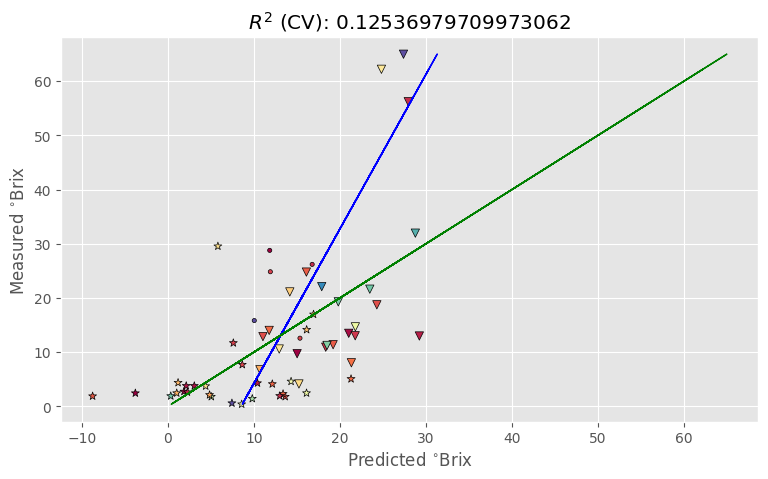

In [11]:
# optimise_pls_cv(x_la,y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



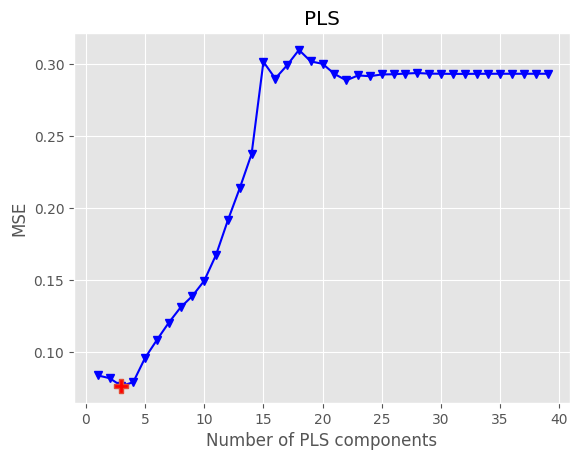

(54, 1) <class 'numpy.ndarray'> [[0.66369326]
 [0.72234145]
 [0.68084528]
 [0.5697319 ]
 [0.61483661]
 [0.92471408]
 [0.66130245]
 [0.55671712]
 [0.6689897 ]
 [0.42838539]
 [0.80581823]
 [0.92088838]
 [1.04383866]
 [0.7519472 ]
 [0.82773806]
 [0.41117845]
 [0.97116268]
 [0.50562356]
 [0.67900353]
 [0.5712629 ]
 [0.76418366]
 [0.7753452 ]
 [0.70404096]
 [0.76575143]
 [0.46294421]
 [0.5229809 ]
 [0.40755549]]
0.5839847452407407 0.312566614 1.482276575 (54,)
0.592443735679536 0.2076726163324087 1.0597301027323587 (54,)
0.362831524622251 0.007008695450962661
R2 calib: 0.373
R2 CV: 0.077
MSE calib: 0.052
MSE CV: 0.077


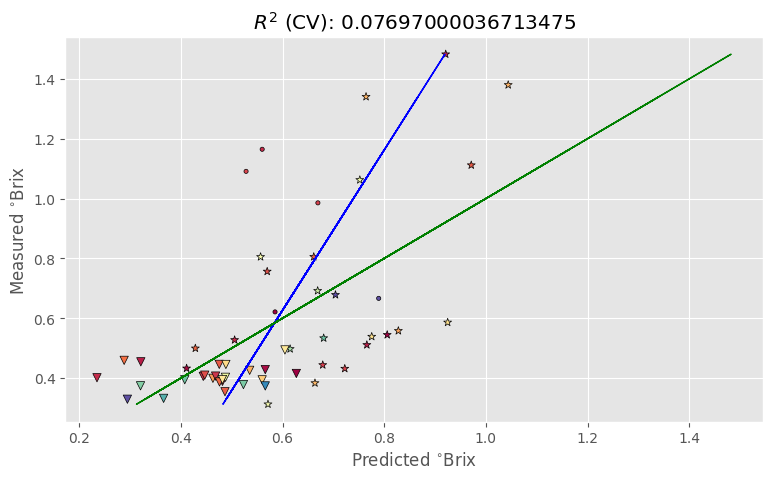

In [12]:
# optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

In [13]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

100% completed
Suggested number of components:  3



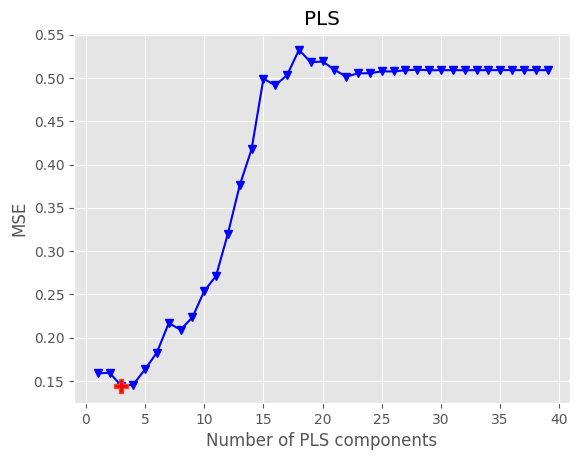

(54, 1) <class 'numpy.ndarray'> [[-0.49479888]
 [-0.4198425 ]
 [-0.47992183]
 [-0.66265903]
 [-0.56789601]
 [-0.12837464]
 [-0.50432847]
 [-0.65811124]
 [-0.48280179]
 [-0.81015351]
 [-0.2958642 ]
 [-0.16154929]
 [ 0.01154481]
 [-0.380775  ]
 [-0.27352672]
 [-0.84344335]
 [-0.06685312]
 [-0.72688334]
 [-0.48299009]
 [-0.64052947]
 [-0.38027062]
 [-0.33993316]
 [-0.43709744]
 [-0.35458853]
 [-0.79700254]
 [-0.7516939 ]
 [-0.89185226]]
-0.6300255935830665 -1.1629376677220686 0.3935791322690429 (54,)
-0.6141439262076958 -1.158650192231192 0.058043104042614035 (54,)
0.4016076053488608 0.002612644321756458
R2 calib: 0.407
R2 CV: 0.108
MSE calib: 0.096
MSE CV: 0.144


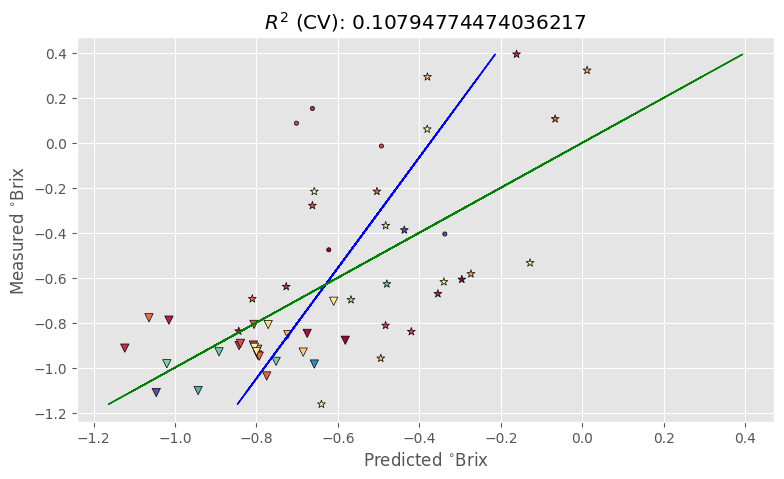

In [14]:
# optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



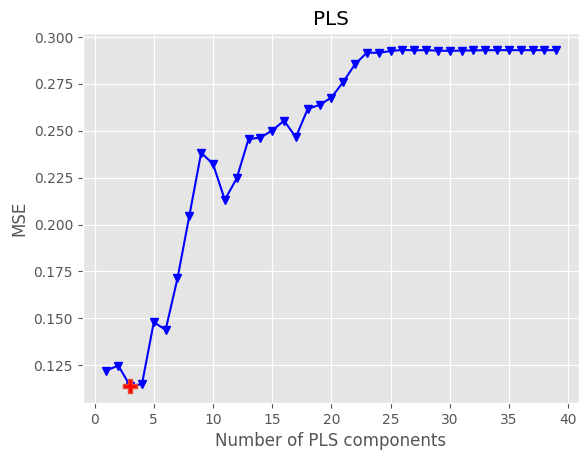

(56, 1) <class 'numpy.ndarray'> [[4.45185281]
 [4.33379357]
 [4.38932534]
 [4.57269872]
 [4.46696097]
 [4.18149313]
 [4.14198082]
 [4.39992236]
 [4.56702273]
 [4.26346354]
 [4.38984078]
 [4.71870934]
 [4.22983289]
 [4.15020909]
 [4.01221974]
 [4.34400018]
 [4.25955715]
 [4.68929539]
 [4.07369156]
 [4.64672207]
 [4.40052694]
 [4.49338197]
 [4.37332484]
 [4.27044994]
 [4.33027231]
 [4.3111235 ]
 [4.65197074]]
4.521913490728343 3.422942036707019 5.0526284847384995 (56,)
4.5184234230319555 4.050354849026919 5.015641281635213 (56,)
0.40833278389209293 0.0017830679096209163
R2 calib: 0.359
R2 CV: 0.132
MSE calib: 0.084
MSE CV: 0.114


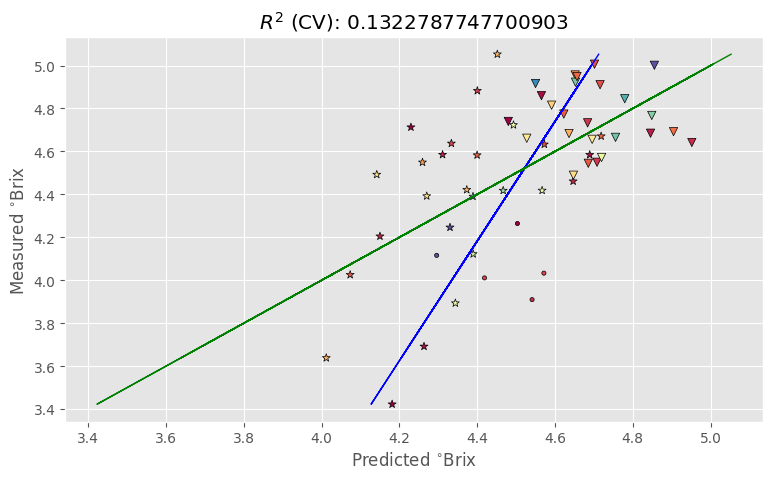

In [15]:
# optimise_pls_cv(x_sla,log_y_weighted_sla, 40, plot_components=True)
optimise_pls_cv(x_sla,log_y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



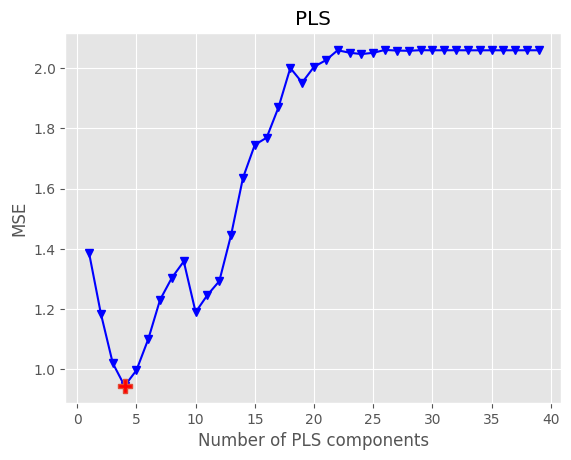

(57, 1) <class 'numpy.ndarray'> [[2.06926206]
 [1.45688824]
 [0.58727726]
 [2.18994256]
 [1.69089744]
 [0.95800027]
 [1.53072841]
 [1.74067221]
 [2.00450621]
 [1.04374863]
 [1.29825609]
 [2.56905049]
 [1.82442281]
 [0.25358621]
 [1.21608696]
 [1.24225437]
 [2.21085015]
 [1.38076871]
 [1.36632003]
 [0.12439473]
 [2.08550819]
 [1.32399447]
 [1.22530281]
 [1.19951706]
 [1.16984556]
 [1.1556189 ]
 [1.54193933]]
2.018387095391922 -0.9617662586536878 4.173871752423952 (57,)
2.0182860733117436 0.02402726998273108 3.4059306453879197 (57,)
0.5341931038481157 1.870943373571431e-05
R2 calib: 0.446
R2 CV: 0.267
MSE calib: 0.715
MSE CV: 0.945


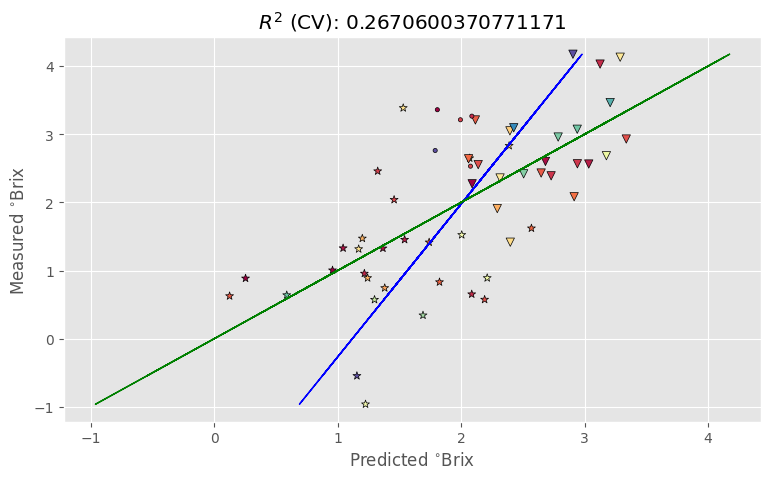

In [16]:
# optimise_pls_cv(x_la,log_y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,log_y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)